
# CODE TO CLASSIFY IMAGES (CIFAR-10) USING CNNs
# Dr. Ryan Ahmed @STEMplicity
![image.png](attachment:image.png)



# STEP 0: PROBLEM STATEMENT

- CIFAR-10 is a dataset that consists of several images divided into the following 10 classes: 
    - Airplanes
    - Cars 
    - Birds
    - Cats
    - Deer
    - Dogs
    - Frogs
    - Horses
    - Ships
    - Trucks

- The dataset stands for the Canadian Institute For Advanced Research (CIFAR)
- CIFAR-10 is widely used for machine learning and computer vision applications. 
- The dataset consists of 60,000 32x32 color images and 6,000 images of each class.
- Images have low resolution (32x32). 
- Data Source: https://www.cs.toronto.edu/~kriz/cifar.html


# STEP #1: IMPORT LIBRARIES/DATASETS

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [3]:
X_train.shape

(50000, 32, 32, 3)

In [4]:
X_test.shape

(10000, 32, 32, 3)

In [5]:
y_train.shape

(50000, 1)

In [6]:
y_test.shape

(10000, 1)

# STEP #2: VISUALIZE DATA

[5]


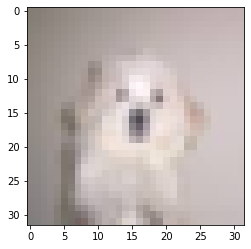

In [7]:
i = 32012
plt.imshow(X_train[i])
print(y_train[i])

[0]


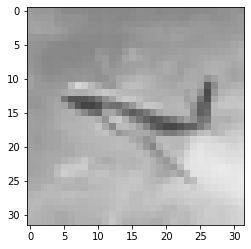

In [8]:
j= 15000
plt.imshow(X_train[j])
print(y_train[j])

[9]


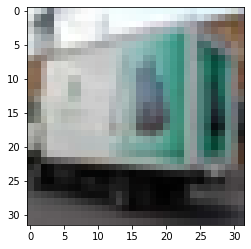

In [9]:
k= 15005
plt.imshow(X_train[k])
print(y_train[k])

[8]


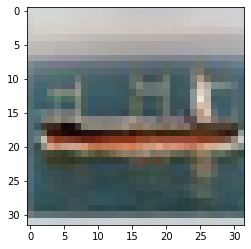

In [10]:
l= 15007
plt.imshow(X_train[l])
print(y_train[l])

/usr/local/lib/python3.6/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


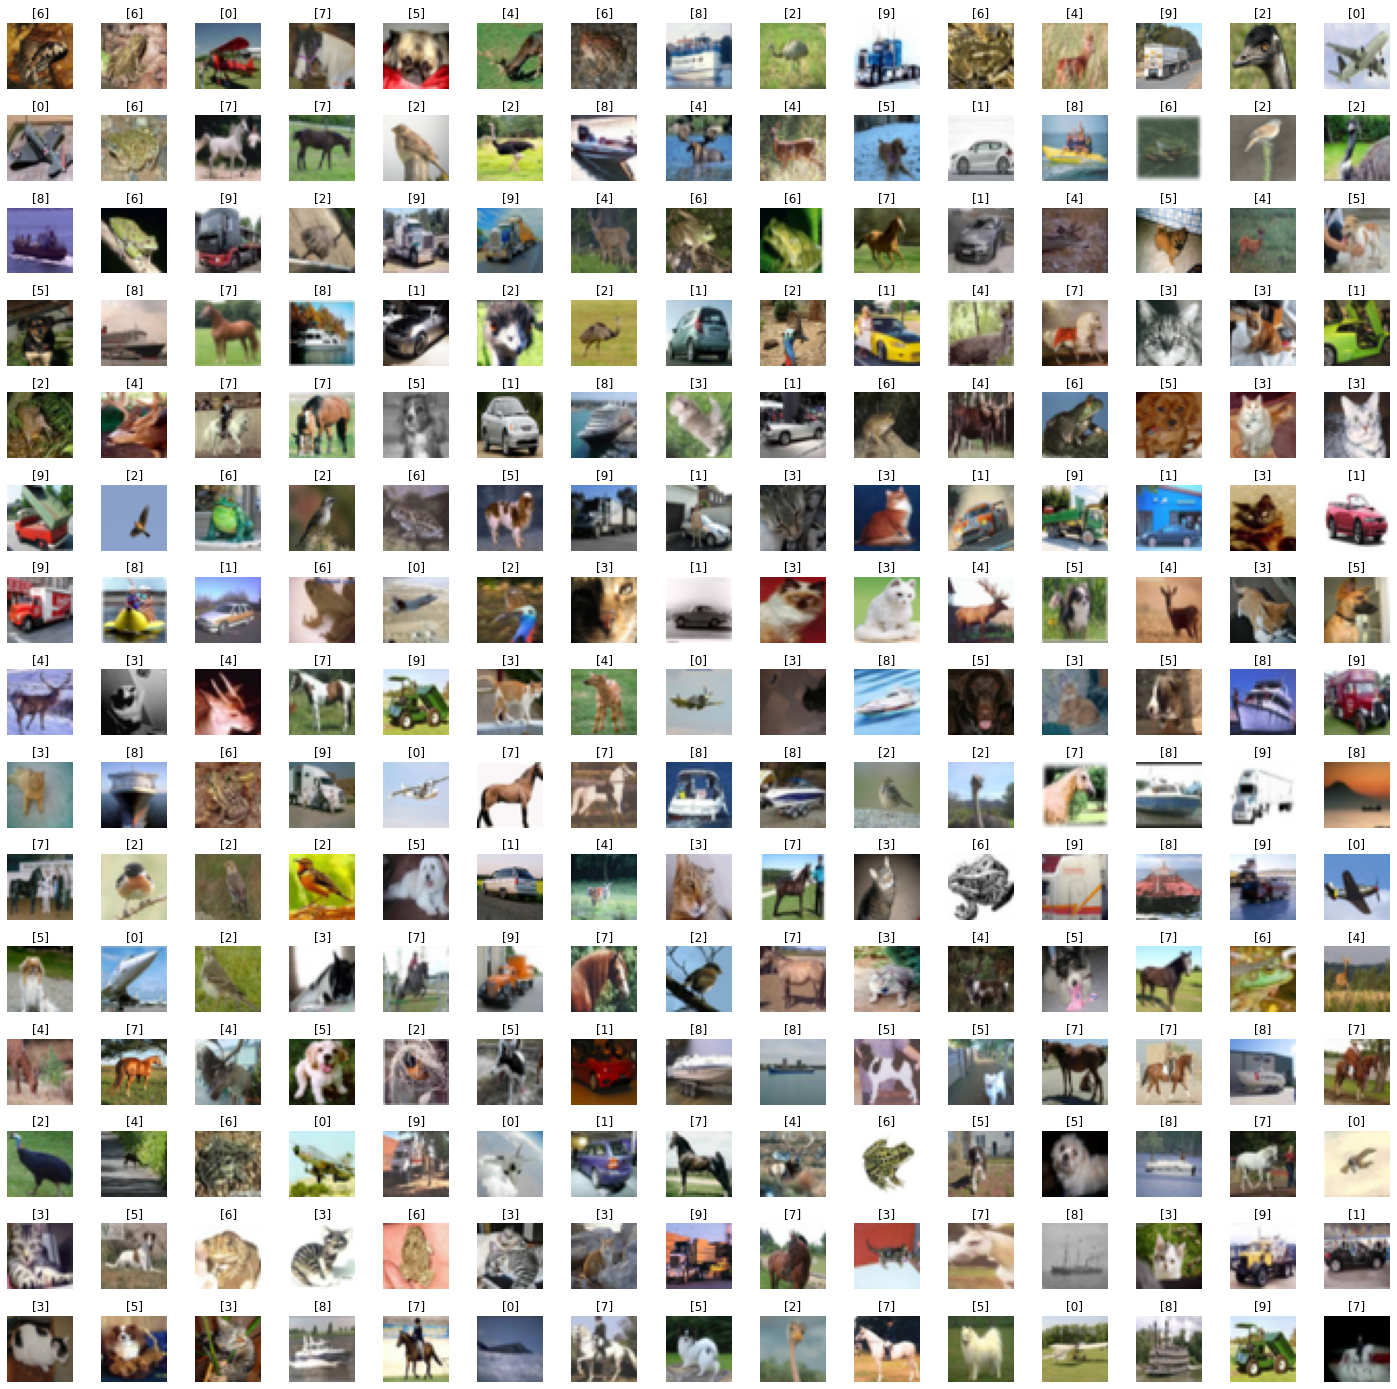

In [11]:
W_grid = 15
L_grid = 15

fig, axes = plt.subplots(L_grid, W_grid, figsize = (25, 25))
axes = axes.ravel()

n_training = len(X_train)

for i in range(0, L_grid * W_grid):
  index = np.random.randint(0, n_training) #pick a random number
  axes[i].imshow(X_train[index]) #pick the image of the corresponding random index chosen
  axes[i].set_title(y_train[index]) #set title of the corresponding label
  axes[i].axis('off') #set axis as off

plt.subplots_adjust(hspace = 0.4) #keep horizontal spacing between images as 0.4

# STEP #3: DATA PREPARATION

In [12]:
#Data conversion to float
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [13]:
num_cat = 10 #set number of categories as 10

In [14]:
y_train #check y_train values

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [15]:
#Converting categorical number to binary form
import keras
y_train = keras.utils.to_categorical(y_train, num_cat)

In [16]:
y_train #Check y_train values again

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [17]:
y_test #Also check y_test values

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]], dtype=uint8)

In [18]:
#Converting categorical number to binary form
y_test = keras.utils.to_categorical(y_test, num_cat)

In [19]:
y_test #Also check y_test values

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [20]:
X_train #Check X_train values converted to float

array([[[[ 59.,  62.,  63.],
         [ 43.,  46.,  45.],
         [ 50.,  48.,  43.],
         ...,
         [158., 132., 108.],
         [152., 125., 102.],
         [148., 124., 103.]],

        [[ 16.,  20.,  20.],
         [  0.,   0.,   0.],
         [ 18.,   8.,   0.],
         ...,
         [123.,  88.,  55.],
         [119.,  83.,  50.],
         [122.,  87.,  57.]],

        [[ 25.,  24.,  21.],
         [ 16.,   7.,   0.],
         [ 49.,  27.,   8.],
         ...,
         [118.,  84.,  50.],
         [120.,  84.,  50.],
         [109.,  73.,  42.]],

        ...,

        [[208., 170.,  96.],
         [201., 153.,  34.],
         [198., 161.,  26.],
         ...,
         [160., 133.,  70.],
         [ 56.,  31.,   7.],
         [ 53.,  34.,  20.]],

        [[180., 139.,  96.],
         [173., 123.,  42.],
         [186., 144.,  30.],
         ...,
         [184., 148.,  94.],
         [ 97.,  62.,  34.],
         [ 83.,  53.,  34.]],

        [[177., 144., 116.],
       

In [21]:
#Normalizing X_train and X_test values between 0 to 1
X_train = X_train/255
X_test = X_test/255

In [22]:
X_train #Check X_train values again

array([[[[0.23137255, 0.24313726, 0.24705882],
         [0.16862746, 0.18039216, 0.1764706 ],
         [0.19607843, 0.1882353 , 0.16862746],
         ...,
         [0.61960787, 0.5176471 , 0.42352942],
         [0.59607846, 0.49019608, 0.4       ],
         [0.5803922 , 0.4862745 , 0.40392157]],

        [[0.0627451 , 0.07843138, 0.07843138],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509805, 0.21568628],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117648, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215687, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941177, 0.19607843],
         [0.47058824, 0.32941177, 0.19607843],
         [0.42745098, 0.28627452, 0.16470589]],

        ...,

        [[0.8156863 , 0.6666667 , 0.3764706 ],
         [0.7882353 , 0.6       , 0.13333334]

In [23]:
X_train.shape #Check shape

(50000, 32, 32, 3)

In [24]:
input_shape = X_train.shape[1:] #Slicing values to procure shape of only a single image
print(input_shape)

(32, 32, 3)


# STEP #4: TRAIN THE MODEL

In [25]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [26]:
#Creating CNN Model with 2 Convolution Layers, MaxPooling Layer, a Dropout Layer (to remove unwanted weights) and twice the ANN layer
cnn_model = Sequential()
cnn_model.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu', input_shape = input_shape))
cnn_model.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'))
cnn_model.add(MaxPooling2D(pool_size = (2,2)))
cnn_model.add(Dropout(0.4))

cnn_model.add(Conv2D(filters = 128, kernel_size = (3,3), activation = 'relu'))
cnn_model.add(Conv2D(filters = 128, kernel_size = (3,3), activation = 'relu'))
cnn_model.add(AveragePooling2D(2,2))
cnn_model.add(MaxPooling2D(pool_size = (2,2)))
cnn_model.add(Dropout(0.4))

cnn_model.add(Flatten())
cnn_model.add(Dense(units = 1024, activation = 'relu'))
cnn_model.add(Dense(units = 1024, activation = 'relu'))
#Finally we put 10 nodes for 10 outputs with softmax activation function
cnn_model.add(Dense(units = 10, activation = 'softmax'))

In [27]:
cnn_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])

In [28]:
history = cnn_model.fit(X_train, y_train, batch_size = 32, epochs = 25, shuffle = True)

Epoch 1/25
1563/1563 [==============================] - 504s 322ms/step - loss: 1.7524 - accuracy: 0.3388
Epoch 2/25
1563/1563 [==============================] - 502s 321ms/step - loss: 1.3980 - accuracy: 0.4912
Epoch 3/25
1563/1563 [==============================] - 492s 315ms/step - loss: 1.2351 - accuracy: 0.5595
Epoch 4/25
1563/1563 [==============================] - 482s 309ms/step - loss: 1.1396 - accuracy: 0.5952
Epoch 5/25
1563/1563 [==============================] - 487s 312ms/step - loss: 1.0662 - accuracy: 0.6238
Epoch 6/25
1563/1563 [==============================] - 482s 309ms/step - loss: 1.0149 - accuracy: 0.6427
Epoch 7/25
1563/1563 [==============================] - 484s 310ms/step - loss: 0.9737 - accuracy: 0.6566
Epoch 8/25
1563/1563 [==============================] - 498s 319ms/step - loss: 0.9301 - accuracy: 0.6723
Epoch 9/25
1563/1563 [==============================] - 498s 318ms/step - loss: 0.9066 - accuracy: 0.6807
Epoch 10/25
1563/1563 [=======================

# STEP #5: EVALUATING THE MODEL

In [29]:
#Evaluating the accuracy with the testing values using the model created
evaluation = cnn_model.evaluate(X_test, y_test)
print('Test Accuracy: {}'.format(evaluation[1]))

313/313 [==============================] - 25s 80ms/step - loss: 0.7342 - accuracy: 0.7531
Test Accuracy: 0.7530999779701233


In [31]:
#We are predicting the classes with the cnn_model created for the X_test and generating label outputs that we later store in predicted_classes
predicted_classes = cnn_model.predict_classes(X_test)
predicted_classes

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([3, 8, 8, ..., 5, 1, 7])

In [32]:
y_test #Checking matrix

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [33]:
y_test = y_test.argmax(1) #Converting binary to decimal

In [34]:
y_test

array([3, 8, 8, ..., 5, 1, 7])

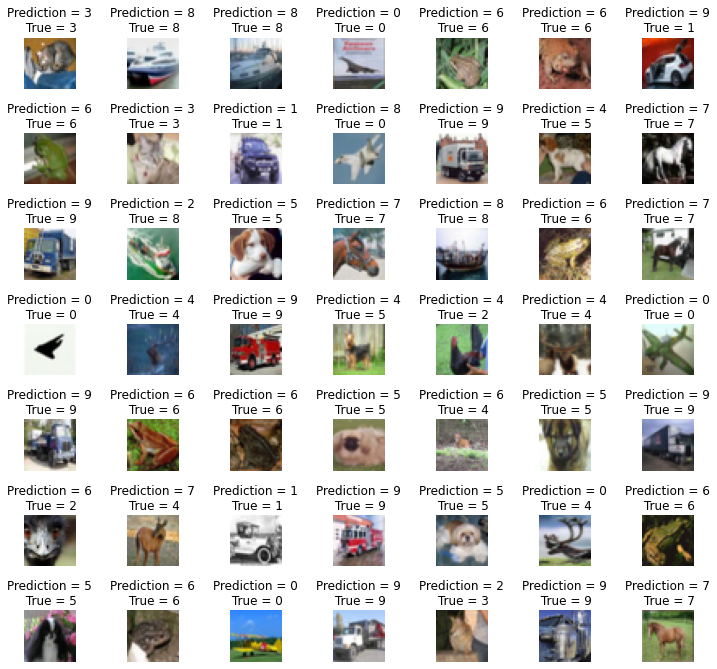

In [37]:
L = 7
W = 7
fig, axes = plt.subplots(L, W, figsize = (12, 12))
axes = axes.ravel()

for i in np.arange(0, L*W):
  axes[i].imshow(X_test[i])
  axes[i].set_title('Prediction = {}\n True = {}'.format(predicted_classes[i], y_test[i]))
  axes[i].axis('off')

plt.subplots_adjust(wspace = 1)

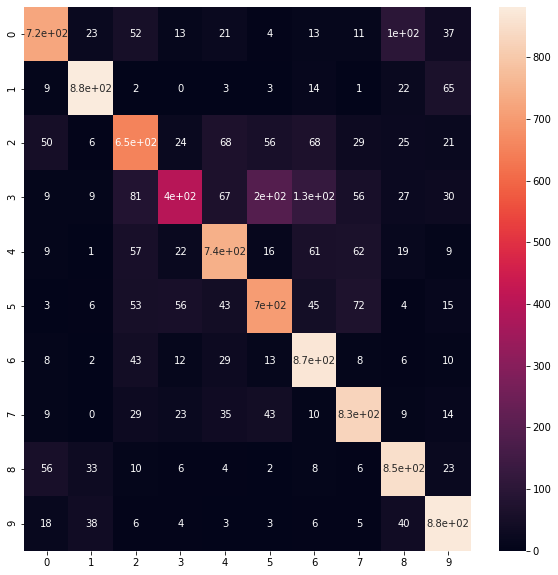

In [40]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, predicted_classes)
cm
plt.figure(figsize = (10, 10))
sns.heatmap(cm, annot = True)

# STEP #6: SAVING THE MODEL

In [41]:
import os
directory = os.path.join(os.getcwd(), 'saved_models')

if not os.path.isdir(directory):
  os.makedirs(directory)
model_path = os.path.join(directory, 'keras_cifar10_trained_model.h5')
cnn_model.save(model_path)

# STEP #7: IMPROVING THE MODEL WITH DATA AUGMENTATION

- Image Augmentation is the process of artificially increasing the variations of the images in the datasets by flipping, enlarging, rotating the original images. 
- Augmentations also include shifting and changing the brightness of the images.

# STEP 7.1 DATA AUGMENTATION FOR THE CIFAR-10 DATASET

In [42]:
import keras
from keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [43]:
#Convert images into float
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [44]:
X_train.shape

(50000, 32, 32, 3)

In [45]:
#Create instance of Image Data generator class with image rotation angle as 0 to 90
from keras.preprocessing.image import ImageDataGenerator
gen_train = ImageDataGenerator(rotation_range = 90)
gen_train.fit(X_train)

In [56]:
#Took a sample of 8 images and stored in X_train_sample
n = 25 
X_train_sample = X_train[:n]

In [57]:
X_train_sample.shape

(25, 32, 32, 3)

In [58]:
#Fitting the sample images with the instance
gen_train = ImageDataGenerator(rotation_range = 90, zoom_range = 1.0, horizontal_flip= True, vertical_flip=False, rescale= True, zca_whitening = True)
gen_train.fit(X_train_sample)

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:337: UserWarning: This ImageDataGenerator specifies `zca_whitening`, which overrides setting of `featurewise_center`.
  warnings.warn('This ImageDataGenerator specifies '


In [50]:
!pip install numpy scipy

In [51]:
!pip install Pillow

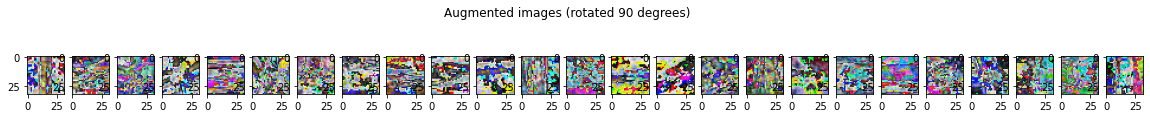

In [59]:
from PIL import Image
fig = plt.figure(figsize = (20,2))
for x_batch in gen_train.flow(X_train_sample, batch_size = n): #get the training samples and generate a flow/batch of images of batch size as 8
  for i in range(0,n): #Plot all those 8 images of each batch
    ax = fig.add_subplot(1, n, i+1)
    ax.imshow(Image.fromarray(np.uint8(x_batch[i]))) #Converts an array into an image
  fig.suptitle('Augmented images (rotated 90 degrees)')
  plt.show()
  break; #As the first for loop goes on endlessly, we are limiting this only for one batch

# STEP 7.2 MODEL TRAINING USING AUGEMENTED DATASET

In [62]:
datagen = ImageDataGenerator(rotation_range= 90, 
                             width_shift_range = 0.1,
                             brightness_range = (1, 1.5),
                             horizontal_flip = True,
                             vertical_flip = True,
                             zca_whitening = True
                             )

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:337: UserWarning: This ImageDataGenerator specifies `zca_whitening`, which overrides setting of `featurewise_center`.
  warnings.warn('This ImageDataGenerator specifies '


In [63]:
datagen.fit(X_train)

In [ ]:
cnn_model.fit_generator(datagen.flow(X_train, y_train, batch_size = 32), epochs= 2) #way of generating new images and fitting the model right away with the new data (ie: with the new images)

In [ ]:
score = cnn.model.evaluate(X_test, y_test)
print('Test Accuracy', score[1])

In [ ]:
#Save the model
directory = os.path.join(os.getcwd(), 'saved_models')

if not os.path.isdir(directory):
  os.makedirs(directory)
model_path = os.path.join(directory, 'keras_cifar10_trained_model_aug.h5')
cnn_model.save(model_path)

# GREAT JOB! 